# **Error Function Selection for Robust FinTech Models**

# **Overview**:

# Motivation:
This notebook helps us understand outliers,their effect on financial data and how we handle them optimally by modifying the error function. The error function/cost function(E) tells us how accurate a model's predictions are.The choice of error function is critical because it directly influences how the model responds to noise, anomalies, or outliers in the dataset.

# Goal:
Most datasets we use have outliers. they may be considered noise/anomalies but handling them is an essential step in ML. Comparing functions like Mean Squared Error (MSE) and Mean Absolute Error (MAE) helps us understand how different formulations handle such noisy conditions and guide the development of more reliable FinTech models.



# **Methodology:**

## MSE & MAE:
We use linear regression with gradient descent to train our models.We train two models , one with MSE for the cost function and the other with MAE.We make sure that the dataset has some outliers to analyse the effect of that and how it affects the choice of our cost function.

Cost function of $MSE = (1/n) * Σ (y_i - ŷ_i)^2$ . `Slide 15 Lecture 1`

Cost function of $MAE = (1/n) * Σ |y_i - ŷ_i|$.


 * $n$ = number of training examples
 * $y_i$ = the true value of the output from the training dataset
 * $ŷ_i$ = the prediction $(w.X + b)$ of the model

## Observations & Ideology:
MSE gradient: Smooth and differentiable everywhere hence easier for optimization.

MAE gradient: Not differentiable at 0 hence harder for optimization.

We run gradient descent iteratively to minimise the loss / cost function.
Then we plot our results and compare them to find the more robust cost function



# **Multilingual Data Handling:**

## Multilingual Data in FinTech:

We often need to use multilingual text data from sources like news, reports, and social media. This has wide applications even in the fintech domain and is used in market sentiment analysis. This creates the issue of language variability(different words for the same concept)

## Challenges of Multilingual Text:

Slang and informal terms often act like outliers in text data, strongly affecting sentiment analysis and leading to potential misinterpretations. Code-switching, such as mixing Hindi and English in a sentence (e.g., “Market kal crash ho gaya”), can confuse models trained primarily on English. Regional variations in terminology, where “share,” “equity,” and “stock” all refer to the same concept, create fragmented representations and add noise. Similarly, typos and misspellings like “stcok” instead of “stock” are treated as entirely new words, further distorting analysis.
## Representation in Embeddings:

When text is converted into embeddings (vectors), frequent terms (like “profit,” “loss”) cluster tightly. Rare or inconsistent text forms (slang, typos, low-resource languages) are far from the main cluster in this high-dimensional space.These distant points act like statistical outliers.

## Model Robustness and Mitigation:

With MSE loss, such linguistic outliers get over-penalized because errors are squared.With MAE loss, the model is more robust since errors grow linearly.
Combining robust error functions with preprocessing (normalization, multilingual embeddings) helps FinTech models handle noisy multilingual text better.

# **FinTech Applications**

Similar practical problems are highly important in the FinTech industry. A robust regression model trained with careful feature engineering and appropriate error functions (MSE vs. MAE) can be applied in several real-world contexts:

1. Credit and Lending Risk Assessment
Incorporate market cap predictions of small buisnesses to assess corporate loan eligibility and financial stability.

2. Mergers & Acquisitions Analytics
Estimate target company valuations to support mereger decisions and strategic planning.

3. Financial Forecasting and Analytics
Forecast sector growth trends and integrate predictions into dashboards or alert systems.




#Implementation for Predicting Market Cap

##1. Data creation and feature engineering
We will utilise yahoo finance to fetch the data and use it in our program.

To predict the market cap of companies we will curate our dataset to contain Nifty 100 companies data for a single financial year, having features:
- Revenue  
- Net Income  
- Debt ratio  ( debt/total assets)
- Free cash flow
- Market Cap

Some of them can directly be fetched, others will have to be calculated.



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# List of Nifty 100 companies
nifty_100_tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'HINDUNILVR.NS',
    'KOTAKBANK.NS', 'LT.NS', 'ITC.NS', 'AXISBANK.NS', 'BAJFINANCE.NS',
    'MARUTI.NS', 'TITAN.NS', 'ASIANPAINT.NS', 'SUNPHARMA.NS', 'M&M.NS', 'ULTRACEMCO.NS',
    'POWERGRID.NS', 'NTPC.NS', 'ONGC.NS', 'SBIN.NS', 'HCLTECH.NS', 'WIPRO.NS',
    'TATAMOTORS.NS', 'TECHM.NS', 'BAJAJ-AUTO.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'GRASIM.NS',
    'SHREECEM.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'BAJAJFINSV.NS',
    'BRITANNIA.NS', 'COALINDIA.NS', 'EICHERMOT.NS', 'GAIL.NS', 'HDFCAMC.NS', 'HEROMOTOCO.NS',
    'ICICIPRULI.NS', 'INDUSINDBK.NS', 'JSWSTEEL.NS',
    'NESTLEIND.NS', 'NMDC.NS', 'OIL.NS', 'RELIANCE.NS', 'SBIN.NS', 'SHREECEM.NS',
    'TATACONSUM.NS', 'TATAMOTORS.NS', 'TCS.NS', 'TECHM.NS', 'ULTRACEMCO.NS', 'WIPRO.NS'
]


# Initialize an empty list to store company data
company_data = []
print("Fetching data through yfinance. Please wait")
# Loop through each ticker symbol
for ticker in nifty_100_tickers:
    stock = yf.Ticker(ticker)
    try:
        # We will fetch financial data using yfinance library
        financials = stock.financials
        balance = stock.balance_sheet
        cashflow = stock.cashflow

        # Extract useful features from this year's data and also handle nan errors
        revenue = financials.loc['Total Revenue'].iloc[0] if 'Total Revenue' in financials.index else np.nan
        profit = financials.loc['Net Income'].iloc[0] if 'Net Income' in financials.index else np.nan
        debt = balance.loc['Total Debt'].iloc[0] if 'Total Debt' in balance.index else np.nan
        total_assets = balance.loc['Total Assets'].iloc[0] if 'Total Assets' in balance.index else np.nan
        free_cash_flow = cashflow.loc['Free Cash Flow'].iloc[0] if 'Free Cash Flow' in cashflow.index else np.nan

        # Calculate debt ratio which is a useful indicator to calculating the market cap
        debt_ratio = debt / total_assets if pd.notnull(debt) and pd.notnull(total_assets) else np.nan

        # Calculate market capitalization which is going to be our y
        current_price = stock.history(period='1d')['Close'].iloc[-1]
        shares_outstanding = stock.info.get('sharesOutstanding', np.nan)
        market_cap = current_price * shares_outstanding if pd.notnull(shares_outstanding) else np.nan

        # Append the data to the list
        company_data.append({
            'ticker': ticker,
            'revenue': revenue / 1e6 if pd.notnull(revenue) else np.nan,
            'profit': profit / 1e6 if pd.notnull(profit) else np.nan,
            'debt_ratio': debt_ratio,
            'free_cash_flow': free_cash_flow / 1e6 if pd.notnull(free_cash_flow) else np.nan,
            'market_cap': market_cap / 1e6 if pd.notnull(market_cap) else np.nan
        })
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

df = pd.DataFrame(company_data)

df.dropna(subset=['revenue', 'profit', 'debt_ratio', 'free_cash_flow', 'market_cap'], inplace=True)
df.reset_index(drop=True, inplace=True)

df.to_csv('nifty_100_single_year_data.csv', index=False)

print("Our financial dataset is now ready!")
print(df.head())


Fetching data through yfinance. Please wait
Our financial dataset is now ready!
         ticker    revenue    profit  debt_ratio  free_cash_flow    market_cap
0   RELIANCE.NS  9646930.0  696480.0    0.189514        387360.0  1.836631e+07
1        TCS.NS  2553240.0  485530.0    0.058836        449710.0  1.116072e+07
2   HDFCBANK.NS  2371508.2  673508.3    0.152033       1129220.1  1.460344e+07
3       INFY.NS    19277.0    3158.0    0.055227          4088.0  6.091889e+06
4  ICICIBANK.NS  2055592.9  510292.0    0.082840       1180352.6  9.981578e+06


##2. Training the regression model
After preprocessing the dataset and exporting it into a csv, We will now use it to train linear regression models using gradient descent. We will do this twice, once with loss function as MSE then with the loss function as MAE.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('nifty_100_single_year_data.csv')

feature_cols = [col for col in df.columns if col not in ['ticker', 'market_cap']]
X = df[feature_cols].values
y = df['market_cap'].values

# Save original mean and std for denormalization later
y_mean = y.mean()
y_std = y.std()

# Normalize features to prevent overflow during grad descent
X = (X - X.mean(axis=0)) / X.std(axis=0)
y_norm = (y - y_mean) / y_std

Let us define the necessary helper functions.

In [ ]:
def predict(X, w, b):
    return X @ w + b

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_gradient(X, y_true, y_pred):
    n = len(y_true)
    dw = (-2/n) * X.T @ (y_true - y_pred)
    db = (-2/n) * np.sum(y_true - y_pred)
    return dw, db

def mae_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mae_gradient(X, y_true, y_pred):
    n = len(y_true)
    error_sign = np.sign(y_true - y_pred)
    dw = (-1/n) * X.T @ error_sign
    db = (-1/n) * np.sum(error_sign)
    return dw, db


Cost function of $MSE = (1/n) * Σ (y_i - ŷ_i)^2$ .

Cost function of $MAE = (1/n) * Σ |y_i - ŷ_i|$.



Now we define gradient descent methods using both mean squared error(MSE) and mean asolute error(MAE) as the cost functions: We follow the standard $w.x + b$ form where parameter $w,b$ are updated iteratively.

In [ ]:
def gradient_descent(X, y, loss_fn, grad_fn, lr=1e-2, epochs=5000):
    w = np.zeros(X.shape[1])
    b = 0.0
    for _ in range(epochs):
        y_pred = predict(X, w, b)
        dw, db = grad_fn(X, y, y_pred)
        w -= lr * dw
        b -= lr * db
    final_loss = loss_fn(y, predict(X, w, b))
    return w, b, final_loss

Now we train both our models with learning rate $0.0001$. Basically we are implementing gradient descent and choosing the optimised value of parameters for plotting and analysis. This helps see which model is more robust to outliers.

In [ ]:
# Fit models
w_mse, b_mse, mse_final = gradient_descent(X, y_norm, mse_loss, mse_gradient)
w_mae, b_mae, mae_final = gradient_descent(X, y_norm, mae_loss, mae_gradient)

y_pred_mse_norm = predict(X, w_mse, b_mse)
y_pred_mae_norm = predict(X, w_mae, b_mae)

# Denormalize predictions to actual market cap units
y_pred_mse = y_pred_mse_norm * y_std + y_mean
y_pred_mae = y_pred_mae_norm * y_std + y_mean

mse_loss = np.mean((y - y_pred_mse) ** 2)
mae_loss = np.mean(np.abs(y - y_pred_mae))

##3. Results
Now our model is finally complete, let us now visualise the results.

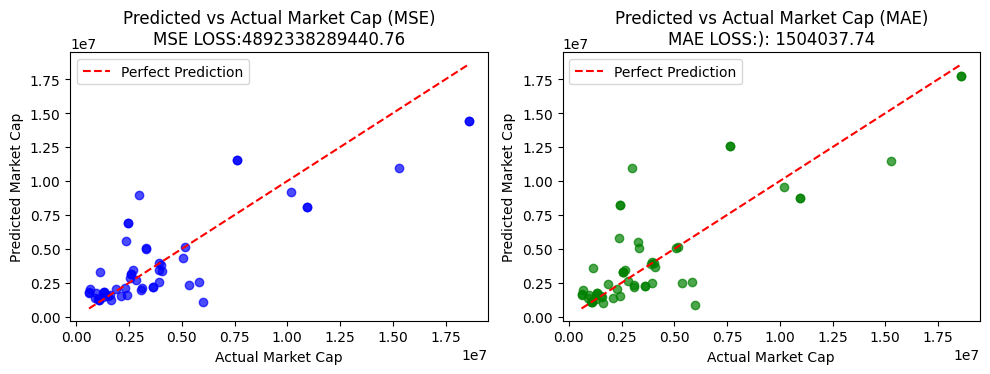

In [ ]:
plt.figure(figsize=(10,4))

# MSE
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_mse, color='blue', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.title(f'Predicted vs Actual Market Cap (MSE)\nMSE LOSS:{mse_loss:.2f}')
plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_mae, color='green', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.title(f'Predicted vs Actual Market Cap (MAE)\nMAE LOSS:): {mae_loss:.2f}')
plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap')
plt.legend()

plt.tight_layout()
plt.show()



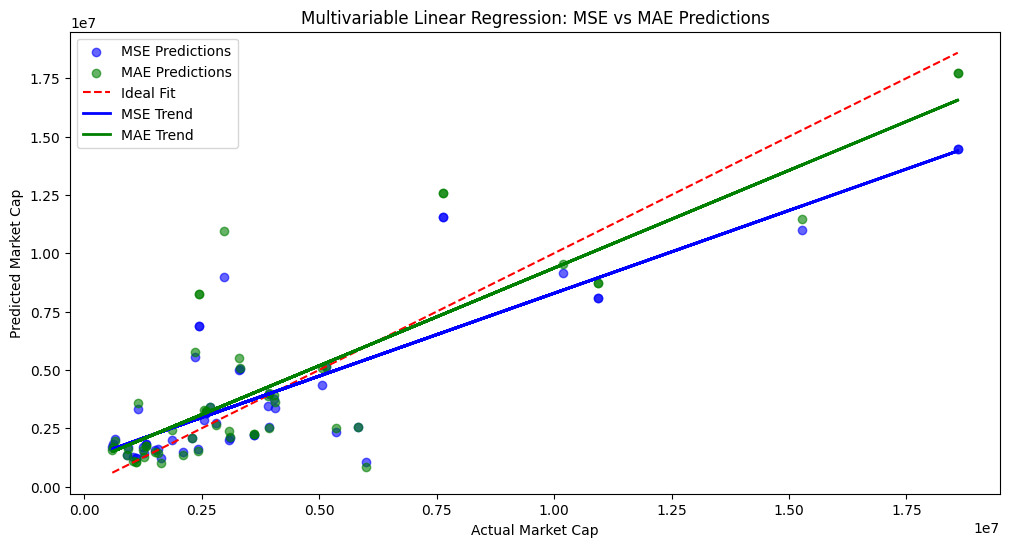

In [ ]:
# graph showing predicted vs Actual with trend lines
plt.figure(figsize=(12,6))
plt.scatter(y, y_pred_mse, color='blue', alpha=0.6, label='MSE Predictions')
plt.scatter(y, y_pred_mae, color='green', alpha=0.6, label='MAE Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal Fit')

# trend lines
m_mse, c_mse = np.polyfit(y, y_pred_mse, 1)
m_mae, c_mae = np.polyfit(y, y_pred_mae, 1)
plt.plot(y, m_mse*y + c_mse, color='blue', linestyle='-', linewidth=2, label='MSE Trend')
plt.plot(y, m_mae*y + c_mae, color='green', linestyle='-', linewidth=2, label='MAE Trend')

plt.xlabel('Actual Market Cap')
plt.ylabel('Predicted Market Cap')
plt.title('Multivariable Linear Regression: MSE vs MAE Predictions')
plt.legend()
plt.show()


# Evaluation Metrics:
- **MSE (Mean Squared Error):**  
  - Penalizes large errors quadratically, making it highly sensitive to outliers.  
  - Differentiable everywhere with smooth gradients hence easier optimization.  
  - Optimizes for the **mean** of the target distribution.  
  - Has a closed-form solution in linear regression (normal equations).  

- **MAE (Mean Absolute Error):**  
  - Penalizes errors linearly, reducing the impact of outliers.  
  - Not differentiable at zero (uses sub-gradients).  
  - Optimizes for the **median** of the target distribution.  
  - No simple closed-form solution thus requires iterative optimization.  

## **Key Differences:**  
- **Outliers:** MSE is sensitive, MAE is robust.  
- **Optimization:** MSE converges smoothly with closed-form possible, MAE needs iterative solvers.  

## **Practical Implication:**  
- If **outlier sensitivity is desired**, use MSE.  
- If **robust, general predictions** are desired, use MAE.  
- For balance, consider **Huber Loss**.  
